# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from matplotlib.pyplot import subplots, show
from pprint import pprint
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 621


['barrow',
 'carnarvon',
 'mataura',
 'bredasdorp',
 'sahrak',
 'grand river south east',
 'tahe',
 'labuhan',
 'guerrero negro',
 'san policarpo',
 'busselton',
 'hambantota',
 'ushuaia',
 'save',
 'taolanaro',
 'kodiak',
 'butaritari',
 'coihaique',
 'punta arenas',
 'comodoro rivadavia',
 'albany',
 'tiarei',
 'pisco',
 'mar del plata',
 'bethel',
 'new norfolk',
 'santarem',
 'jamestown',
 'ancud',
 'bet dagan',
 'aklavik',
 'thompson',
 'barahona',
 'bambous virieux',
 'mwene-ditu',
 'lebu',
 'constitucion',
 'port hardy',
 'atuona',
 'abu dhabi',
 'dunedin',
 'fort morgan',
 'clyde river',
 'airai',
 'kamenskoye',
 'kharan',
 'hermanus',
 'barentsburg',
 'bluff',
 'yar-sale',
 'varzea alegre',
 'cape town',
 'tiksi',
 'mogadishu',
 'victoria',
 'tasiilaq',
 'kapaa',
 'hasaki',
 'puerto ayora',
 'chuy',
 'makaryev',
 'pevek',
 'hilo',
 'andenes',
 'san quintin',
 'villazon',
 'erzin',
 'mys shmidta',
 'cherskiy',
 'dikson',
 'senmonorom',
 'saint-pierre',
 'mitsamiouli',
 'puerto 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | sahrak
City not found. Skipping...
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 1 | tahe
Processing Record 8 of Set 1 | labuhan
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | san policarpo
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | hambantota
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | save
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | coihaique
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | comodoro rivadavia
Processing Re

Processing Record 35 of Set 4 | dormidontovka
Processing Record 36 of Set 4 | severo-kurilsk
Processing Record 37 of Set 4 | warrenton
Processing Record 38 of Set 4 | trairi
Processing Record 39 of Set 4 | east london
Processing Record 40 of Set 4 | batagay-alyta
Processing Record 41 of Set 4 | hamburg
Processing Record 42 of Set 4 | barcelona
Processing Record 43 of Set 4 | sterlibashevo
Processing Record 44 of Set 4 | xichang
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | general pico
Processing Record 47 of Set 4 | vao
Processing Record 48 of Set 4 | fianarantsoa
Processing Record 49 of Set 4 | pocone
Processing Record 0 of Set 5 | geraldton
Processing Record 1 of Set 5 | ust-kuyga
Processing Record 2 of Set 5 | tondano
Processing Record 3 of Set 5 | maloy
Processing Record 4 of Set 5 | sola
Processing Record 5 of Set 5 | cheuskiny
City not found. Skipping...
Processing Record 6 of Set 5 | puerto del rosario
Processing Record 7 of Set 5 | poum
Processing Reco

Processing Record 24 of Set 8 | baoying
Processing Record 25 of Set 8 | tukrah
Processing Record 26 of Set 8 | ulaanbaatar
Processing Record 27 of Set 8 | jackson
Processing Record 28 of Set 8 | nara
Processing Record 29 of Set 8 | honiara
Processing Record 30 of Set 8 | jaque
Processing Record 31 of Set 8 | tonj
Processing Record 32 of Set 8 | slonim
Processing Record 33 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 8 | maneadero
Processing Record 35 of Set 8 | aleksandrov gay
Processing Record 36 of Set 8 | hauterive
Processing Record 37 of Set 8 | pochutla
Processing Record 38 of Set 8 | inta
Processing Record 39 of Set 8 | ilulissat
Processing Record 40 of Set 8 | quang ngai
Processing Record 41 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 42 of Set 8 | mutsu
Processing Record 43 of Set 8 | hofn
Processing Record 44 of Set 8 | togitsu
Processing Record 45 of Set 8 | salinas
Processing Record 46 of Set 8 | kalmar
Processing R

Processing Record 10 of Set 12 | hare bay
Processing Record 11 of Set 12 | pervomaysk
Processing Record 12 of Set 12 | tamale
Processing Record 13 of Set 12 | narsaq
Processing Record 14 of Set 12 | dagana
Processing Record 15 of Set 12 | valverde del camino
Processing Record 16 of Set 12 | sakakah
Processing Record 17 of Set 12 | kalmunai
Processing Record 18 of Set 12 | evensk
Processing Record 19 of Set 12 | temaraia
City not found. Skipping...
Processing Record 20 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 21 of Set 12 | fare
Processing Record 22 of Set 12 | villa carlos paz
Processing Record 23 of Set 12 | partizanskoye
Processing Record 24 of Set 12 | bengkulu
Processing Record 25 of Set 12 | kundiawa
Processing Record 26 of Set 12 | marsaxlokk
Processing Record 27 of Set 12 | alyangula
Processing Record 28 of Set 12 | edgewater
Processing Record 29 of Set 12 | kashi
Processing Record 30 of Set 12 | araouane
Processing Record 31 of Set 12 | swift current
Pr

In [4]:
 city_data
    

[{'City': 'barrow',
  'Lat': 71.2906,
  'Lng': -156.7887,
  'Max Temp': -0.99,
  'Humidity': 86,
  'Cloudiness': 75,
  'Wind Speed': 9.77,
  'Country': 'US',
  'Date': 1670274686},
 {'City': 'carnarvon',
  'Lat': -24.8667,
  'Lng': 113.6333,
  'Max Temp': 20.64,
  'Humidity': 75,
  'Cloudiness': 67,
  'Wind Speed': 7.15,
  'Country': 'AU',
  'Date': 1670274686},
 {'City': 'mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 10.27,
  'Humidity': 99,
  'Cloudiness': 100,
  'Wind Speed': 0.95,
  'Country': 'NZ',
  'Date': 1670274687},
 {'City': 'bredasdorp',
  'Lat': -34.5322,
  'Lng': 20.0403,
  'Max Temp': 15.33,
  'Humidity': 66,
  'Cloudiness': 100,
  'Wind Speed': 0.6,
  'Country': 'ZA',
  'Date': 1670274687},
 {'City': 'tahe',
  'Lat': 52.3333,
  'Lng': 124.7333,
  'Max Temp': -21.99,
  'Humidity': 98,
  'Cloudiness': 93,
  'Wind Speed': 1.25,
  'Country': 'CN',
  'Date': 1670274688},
 {'City': 'labuhan',
  'Lat': -6.8844,
  'Lng': 112.2051,
  'Max Temp': 26.15,
  'Humidit

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,-0.99,86,75,9.77,US,1670274686
1,carnarvon,-24.8667,113.6333,20.64,75,67,7.15,AU,1670274686
2,mataura,-46.1927,168.8643,10.27,99,100,0.95,NZ,1670274687
3,bredasdorp,-34.5322,20.0403,15.33,66,100,0.60,ZA,1670274687
4,tahe,52.3333,124.7333,-21.99,98,93,1.25,CN,1670274688


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barrow,71.2906,-156.7887,-0.99,86,75,9.77,US,1670274686
1,carnarvon,-24.8667,113.6333,20.64,75,67,7.15,AU,1670274686
2,mataura,-46.1927,168.8643,10.27,99,100,0.95,NZ,1670274687
3,bredasdorp,-34.5322,20.0403,15.33,66,100,0.60,ZA,1670274687
4,tahe,52.3333,124.7333,-21.99,98,93,1.25,CN,1670274688


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

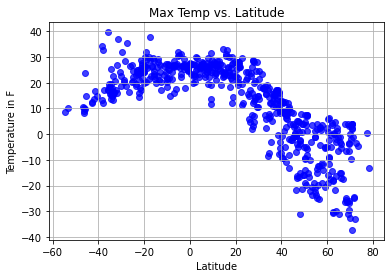

In [9]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y=city_data_df['Max Temp']
plt.scatter(x,y, marker="o", facecolors='blue',alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Temperature in F')
plt.title('Max Temp vs. Latitude')
plt.grid(axis = 'both')
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

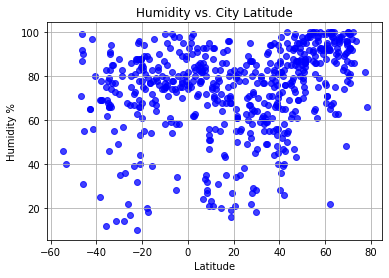

In [10]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y=city_data_df['Humidity']
plt.scatter(x,y, marker="o", facecolors='blue',alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Humidity vs. City Latitude')
plt.grid(axis = 'both')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

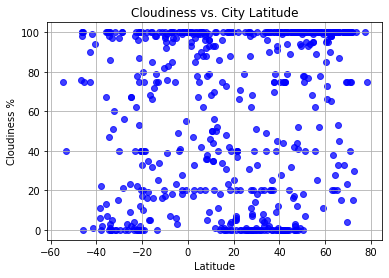

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y=city_data_df['Cloudiness']
plt.scatter(x,y, marker="o", facecolors='blue',alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Cloudiness vs. City Latitude')
plt.grid(axis = 'both')


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

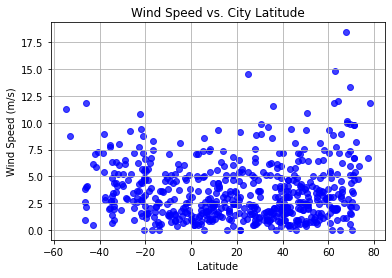

In [12]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y=city_data_df['Wind Speed']
plt.scatter(x,y, marker="o", facecolors='blue',alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. City Latitude')
plt.grid(axis = 'both')
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def func_regression(x,y,df,n):
    headers = list(df.columns)
    x = df[headers[1]]
    y=df[headers[n]]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    correlation = st.pearsonr(x,y)
    print(f"The correlation between {headers[n]} and Latitude is {round(correlation[0],2)}")
    plt.xlabel('Latitude')
    plt.ylabel(headers[n])
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df[('Lat')]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barrow,71.2906,-156.7887,-0.99,86,75,9.77,US,1670274686
4,tahe,52.3333,124.7333,-21.99,98,93,1.25,CN,1670274688
6,guerrero negro,27.9769,-114.0611,20.09,65,8,7.51,MX,1670274689
7,san policarpo,12.1791,125.5072,26.48,76,100,4.07,PH,1670274689
9,hambantota,6.1241,81.1185,24.95,83,100,2.12,LK,1670274690


In [15]:
list(northern_hemi_df.columns)


['City',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed',
 'Country',
 'Date']

In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df[('Lat')]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,carnarvon,-24.8667,113.6333,20.64,75,67,7.15,AU,1670274686
2,mataura,-46.1927,168.8643,10.27,99,100,0.95,NZ,1670274687
3,bredasdorp,-34.5322,20.0403,15.33,66,100,0.60,ZA,1670274687
5,labuhan,-6.8844,112.2051,26.15,82,100,1.44,ID,1670274688
8,busselton,-33.6500,115.3333,13.30,74,0,5.33,AU,1670274690


###  Temperature vs. Latitude Linear Regression Plot

In [18]:
# Linear regression on Northern Hemisphere
# x = northern_hemi_df['Lat']
# y = northern_hemi_df['Max Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# regress_values = x * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x,y)
# plt.plot(x,regress_values,"r-")
# correlation = st.pearsonr(x,y)
# print(f"The correlation between Temperature and Latitude is {round(correlation[0],2)}")
# plt.xlabel('Latitude')
# plt.ylabel('Temperature')
# plt.annotate(line_eq,xy=(-50,intercept))
# plt.show()

The correlation between Max Temp and Latitude is -0.83


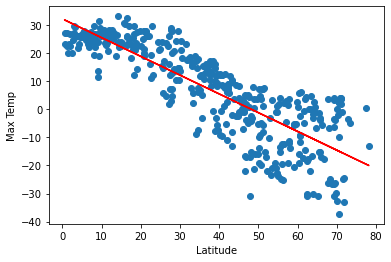

In [19]:
func_regression(x,y,northern_hemi_df,3)

The correlation between Max Temp and Latitude is 0.53


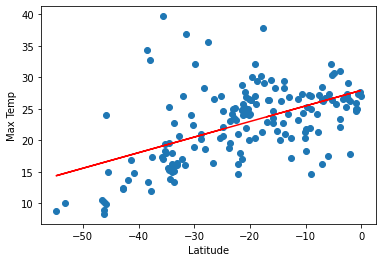

In [20]:
# Linear regression on Southern Hemisphere
func_regression(x,y,southern_hemi_df,3)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r value or the correlation is 0.38


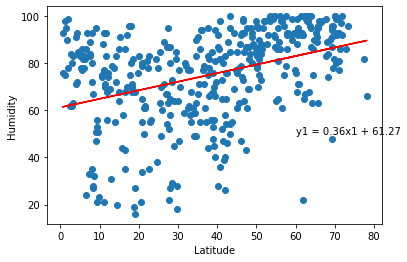

In [21]:

x1 = northern_hemi_df['Lat']
y1 = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y1 = " + str(round(slope,2)) + "x1 + " + str(round(intercept,2))
plt.scatter(x1,y1)
plt.plot(x1,regress_values,"r-")
correlation = st.pearsonr(x1,y1)
print(f"The r value or the correlation is {round(rvalue,2)}")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,xy=(60,50))
plt.show()

The correlation between Humidity and Latitude is 0.38


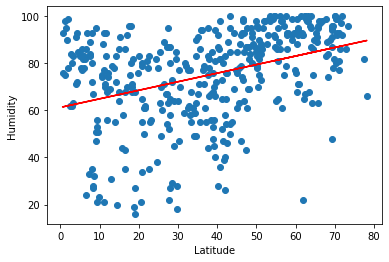

In [22]:
# Northern Hemisphere
func_regression(x,y,northern_hemi_df,4)

The correlation between Humidity and Latitude is 0.2


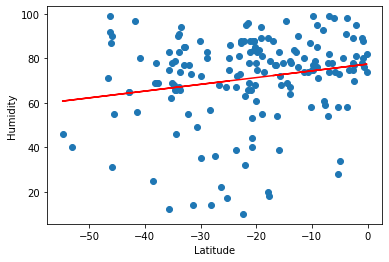

In [23]:
# Southern Hemisphere
func_regression(x,y,southern_hemi_df,4)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between Cloudiness and Latitude is 0.23


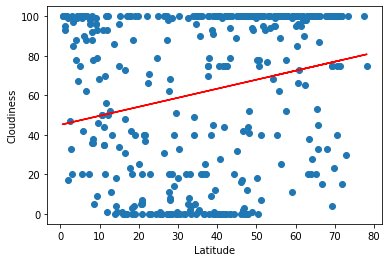

In [24]:
# Northern Hemisphere
func_regression(x,y,northern_hemi_df,5)

The correlation between Cloudiness and Latitude is 0.15


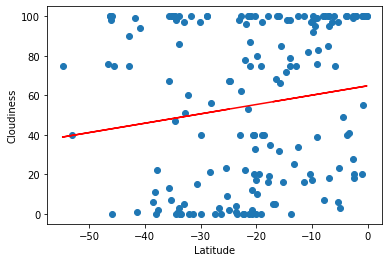

In [25]:
# Southern Hemisphere
func_regression(x,y,southern_hemi_df,5)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between Wind Speed and Latitude is 0.21


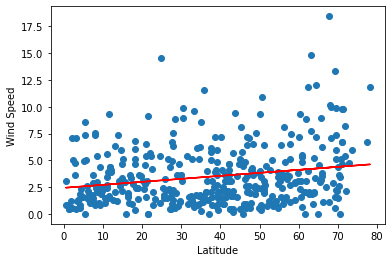

In [26]:
# Northern Hemisphere
func_regression(x,y,northern_hemi_df,6)

The correlation between Wind Speed and Latitude is -0.32


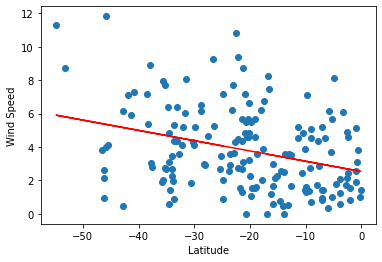

In [27]:
# Southern Hemisphere
func_regression(x,y,southern_hemi_df,6)

**Discussion about the linear relationship:** YOUR RESPONSE HERE